In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


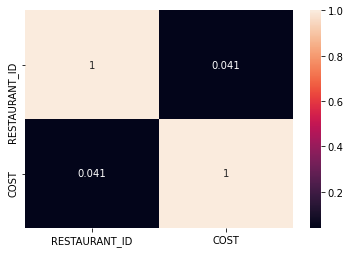

In [4]:
sns.heatmap(df.corr(), annot=True)

In [5]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [6]:
df["RATING"].replace("NEW",0,inplace=True)
df["RATING"].replace("-",0,inplace=True)
df["RATING"].fillna(0,inplace=True)
df['RATING'] = df['RATING'].astype(float)

In [7]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES             object
COST               int64
dtype: object

In [8]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              0
VOTES            1204
COST                0
dtype: int64

In [9]:
df['CITY'].unique()


array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [10]:
df['CITY'].fillna('Missing', inplace=True)  
df['LOCALITY'].fillna('Missing', inplace=True)

In [11]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1204
COST                0
dtype: int64

In [12]:
df[df['RATING']==0]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,0.0,NaN,400
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,0.0,NaN,200
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,0.0,NaN,200
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,0.0,NaN,300
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,0.0,NaN,800
...,...,...,...,...,...,...,...,...,...
12630,CASUAL DINING,9959,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),Gurgaon,Golf Course Road,0.0,NaN,1200
12641,CASUAL DINING,8312,Kerala,7:30am – 11:30pm (Mon-Sun),Kochi,Pallimukku,0.0,NaN,300
12646,QUICK BITES,6050,"Kerala, Chinese",11am – 11pm (Mon-Sun),Ernakulam,Market Road,0.0,NaN,300
12658,None,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,0.0,NaN,400


In [13]:
df['VOTES'].fillna('0 votes', inplace=True)

In [14]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [15]:
df[df['TITLE']=='None']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
22,None,12499,"North Indian, Fast Food, Mughlai, Rolls",11am – 3am (Mon-Sun),New Delhi,SDA,4.0,1191 votes,450
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,0.0,0 votes,200
83,None,1100,"Chinese, Thai, Asian, Malaysian, Vietnamese, J...",12noon – 1am (Mon-Sun),New Delhi,East of Kailash,4.2,1120 votes,1500
93,None,7400,"Italian, Continental, Chinese, Thai, American,...",9pm – 7am (Mon-Sun),Bangalore,BTM,3.4,15 votes,300
102,None,14529,"Burger, Sandwich","11am – 10pm (Mon, Tue, Wed, Thu, Fri, Sun), 11...",Chennai,Purasaiwalkam,3.5,27 votes,200
...,...,...,...,...,...,...,...,...,...
12656,None,2249,"Burger, Fast Food",12noon – 4am (Mon-Sun),New Delhi,Rajouri Garden,4.2,647 votes,450
12658,None,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,0.0,0 votes,400
12665,None,5679,"Salad, Healthy Food, Beverages, Continental",11:30am – 10pm (Mon-Sun),Faridabad,NIT,3.9,38 votes,200
12673,None,12011,"Fast Food, Rolls",11:30am – 10:30pm (Mon-Sun),New Delhi,Karol Bagh,4.0,617 votes,250


In [16]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)


In [17]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
dtype: object

In [18]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12690 non-null  object 
 5   LOCALITY       12690 non-null  object 
 6   RATING         12690 non-null  float64
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 892.4+ KB


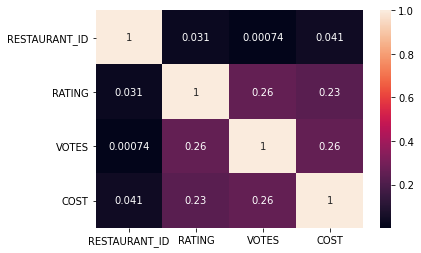

In [20]:
sns.heatmap(df.corr(), annot=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col].astype(str))

In [22]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,321,285,3.6,49.0,1200
1,33,13198,289,1885,67,1047,4.2,30.0,1500
2,31,10915,2976,661,67,1102,3.8,221.0,800
3,95,6346,4130,275,223,136,4.1,24.0,800
4,50,15387,1766,615,223,620,3.8,165.0,300


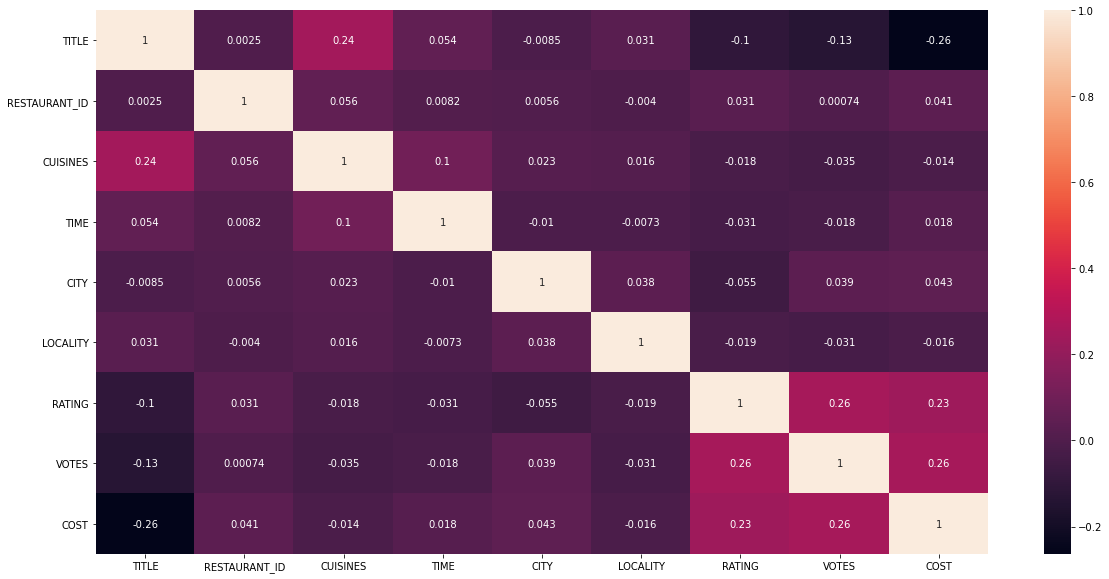

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [24]:
df.drop(columns=['CUISINES','TITLE','LOCALITY', 'RESTAURANT_ID'],inplace=True)

In [25]:
X=df.drop("COST", axis=1)
y=df[["COST"]]

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,TIME,CITY,RATING,VOTES
0,-0.584658,2.100383,0.147237,-0.403533
1,0.934369,-0.912576,0.655819,-0.426964
2,-0.688048,-0.912576,0.316765,-0.191427
3,-1.199692,0.937903,0.571055,-0.434363
4,-0.749021,0.937903,0.316765,-0.260485
...,...,...,...,...
12685,-0.047829,-0.153405,0.316765,0.209355
12686,-0.004088,0.937903,0.740582,1.033116
12687,-0.057108,1.139557,0.486292,0.285812
12688,0.870745,-0.912576,0.062474,-0.424497


In [27]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import train_test_split


In [30]:
max_scr = 0

for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = i, test_size = 0.2)
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    if round(r2_score(y_train, pred_train)*100, 2) == round(r2_score(y_test, pred_test)*100,2):
        print('At random state', i, ' The model performs very well')
        print('At random state:- ', i)
        print('Training r2_score is: ', r2_score(y_train, pred_train)*100)
        print('Testing r2_score is: ', r2_score(y_test, pred_test)*100)

At random state 976  The model performs very well
At random state:-  976
Training r2_score is:  9.82791179980731
Testing r2_score is:  9.834383818618841


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 976, test_size = 0.2)

In [32]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
r2score = r2_score(y_test, y_pred)
cvscore = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5).mean()
print(f'Accuracy = {r2score*100}, CrossvalScore = {cvscore*100} and diff = {(r2score*100) - (cvscore*100)}')

<ipython-input-32-665bb2d119d6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

Accuracy = 32.95322515495245, CrossvalScore = 34.6697113535687 and diff = -1.716486198616252


In [33]:
from sklearn.ensemble import AdaBoostRegressor
ADB = AdaBoostRegressor()
ADB.fit(X_train, y_train)
y_pred = ADB.predict(X_test)
r2score = r2_score(y_test, y_pred)
cvscore = cross_val_score(AdaBoostRegressor(), X_train, y_train, cv=5).mean()
print(f'Accuracy = {r2score*100}, CrossvalScore = {cvscore*100} and diff = {(r2score*100) - (cvscore*100)}')

C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Accuracy = -65.47220425053423, CrossvalScore = -49.355852180621525 and diff = -16.116352069912708


In [34]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
r2score = r2_score(y_test, y_pred)
cvscore = cross_val_score(SGDRegressor(), X_train, y_train, cv=5).mean()
print(f'Accuracy = {r2score*100}, CrossvalScore = {cvscore*100} and diff = {(r2score*100) - (cvscore*100)}')

Accuracy = 9.911967907233176, CrossvalScore = 6.188099646825842 and diff = 3.7238682604073343


C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nikshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_pred

array([375.73770492, 551.47928994, 914.80392157, ..., 610.81081081,
       558.69158879, 684.96732026])

In [36]:
tree_accuracy = round(tree.score(X_train, y_train)*100)
tree_accuracy

30.0

In [37]:
from xgboost import XGBRegressor

xg = XGBRegressor(n_estimators = 1000, learning_rate = 0.3)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
xg_pred

array([ 467.84857,  586.5019 ,  455.1619 , ..., 1313.5996 ,  597.4608 ,
        488.13828], dtype=float32)

In [38]:
xg_accuracy = round(xg.score(X_train, y_train)*100)
xg_accuracy

98.0

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Mean absolute error:', mean_absolute_error(y_test, xg_pred))
print('Mean squared error:', mean_squared_error(y_test, xg_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, xg_pred)))
print('R2 score is:', r2_score(y_test, xg_pred))

Mean absolute error: 311.92760274239276
Mean squared error: 307708.26444132667
Root Mean squared error: 554.714579257952
R2 score is: 0.31139295138454803
